In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
data = pd.read_excel("stats_.xlsx")

In [50]:
data.head()
print(data.columns)

data = data[(data["Age"] > 16) & (data["Age"] < 23)]

# Considering only college going students age category

Index(['Permanent address', 'distance from residence', 'Unnamed: 2', 'Age',
       'Gender', 'Direction of college', 'Distance from college',
       'Institution / Organization', 'Unnamed: 8', 'private college or public',
       'Category',
       'Duration of stay (check the form description for check in and check out timings)',
       'hosteller'],
      dtype='object')


In [51]:
data.describe(include = "all")

,Permanent address,distance from residence,Unnamed: 2,Age,Gender,Direction of college,Distance from college,Institution / Organization,Unnamed: 8,private college or public,Category,Duration of stay (check the form description for check in and check out timings),hosteller
count,137,137.000000,77,137.000000,137.000000,35,136.000000,137,137.000000,136,137,112,137.000000
unique,131,NaN,9,NaN,NaN,5,NaN,101,NaN,2,2,2,NaN
top,Visakhapatnam,NaN,se,NaN,NaN,w,NaN,Vidya Jyothi Institute of Technology,NaN,Private,Participant (in either of Workshops / Techy ev...,16th and 17th March,NaN
freq,3,NaN,24,NaN,NaN,14,NaN,6,NaN,98,117,68,NaN
mean,NaN,380.476642,NaN,19.014599,0.467153,NaN,350.555882,NaN,0.284672,NaN,NaN,NaN,0.598540
std,NaN,284.207817,NaN,1.181882,0.500751,NaN,322.643256,NaN,0.452914,NaN,NaN,NaN,0.491993
min,NaN,8.000000,NaN,17.000000,0.000000,NaN,8.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,67.500000,NaN,18.000000,0.000000,NaN,51.500000,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,377.000000,NaN,19.000000,0.000000,NaN,270.000000,NaN,0.000000,NaN,NaN,NaN,1.000000
75%,NaN,619.000000,NaN,20.000000,1.000000,NaN,600.000000,NaN,1.000000,NaN,NaN,NaN,1.000000


In [65]:
data["hosteller"] = data.apply(lambda x: 1 if np.abs(x["Distance from college"] - x["distance from residence"]) > 20 else 0, axis=1)


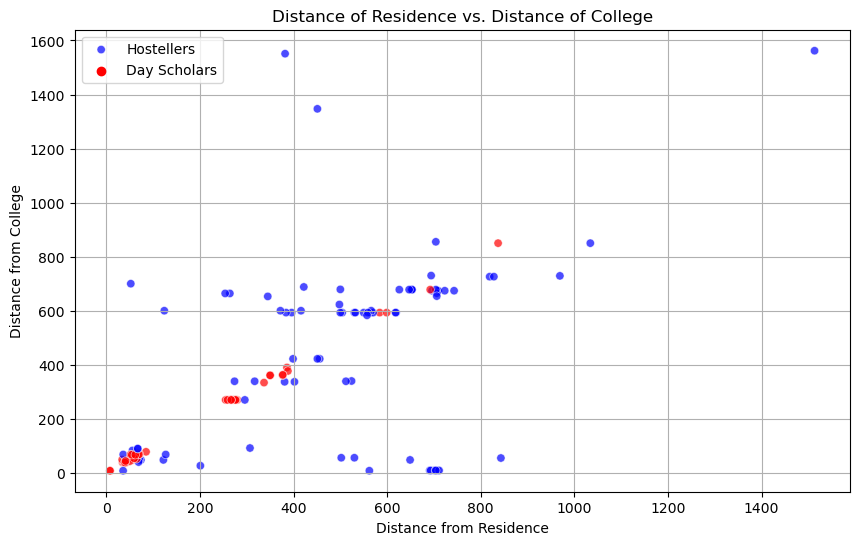

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data for hostellers and non-hostellers
hostellers_data = data[data["hosteller"] == 1]
non_hostellers_data = data[data["hosteller"] == 0]

import matplotlib.pyplot as plt

# Plot for both hostellers and non-hostellers
plt.figure(figsize=(10, 6))

# Plot hostellers
sns.scatterplot(x="distance from residence", y="Distance from college", data=data, hue="hosteller", palette=["red", "blue"], alpha=0.7)

# Add labels and title
plt.title('Distance of Residence vs. Distance of College')
plt.xlabel('Distance from Residence')
plt.ylabel('Distance from College')
plt.legend(labels=[ 'Hostellers', 'Day Scholars'])
plt.grid(True)
plt.show()

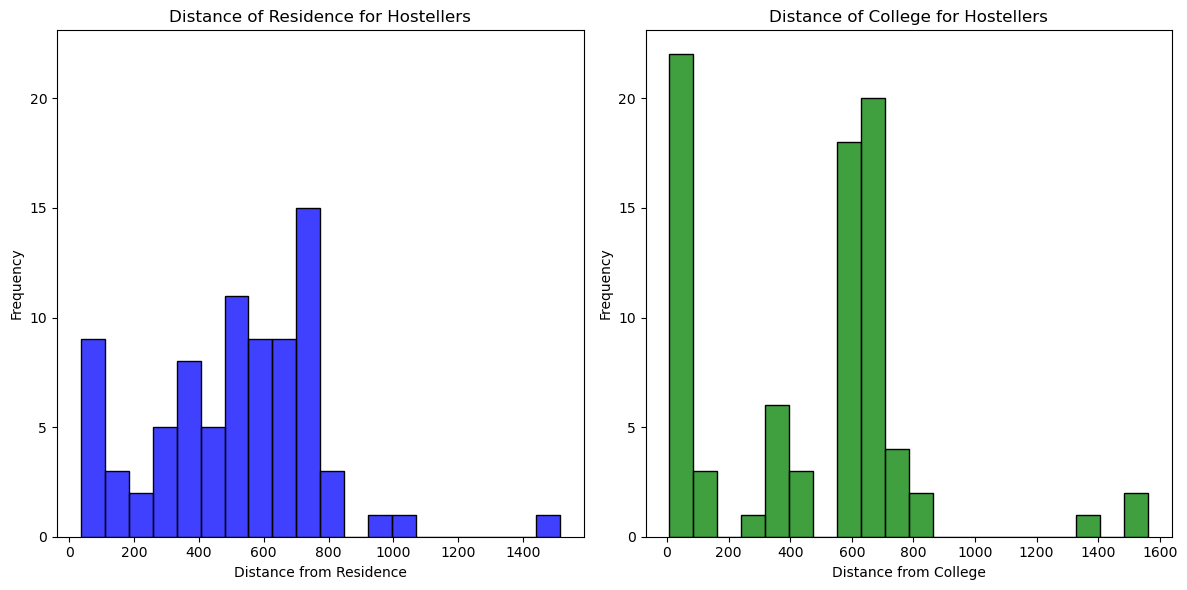

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for hostellers
hostellers_data = data[data["hosteller"] == 1]

# Determine the number of bins
num_bins = 20  # You can adjust this number as needed

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for distance of residence for hostellers
residence_hist = sns.histplot(data=hostellers_data, x="distance from residence", bins=num_bins, ax=axes[0], color='blue')
axes[0].set_title("Distance of Residence for Hostellers")
axes[0].set_xlabel("Distance from Residence")
axes[0].set_ylabel("Frequency")

# Plot histogram for distance of college for hostellers
college_hist = sns.histplot(data=hostellers_data, x="Distance from college", bins=num_bins, ax=axes[1], color='green')
axes[1].set_title("Distance of College for Hostellers")
axes[1].set_xlabel("Distance from College")
axes[1].set_ylabel("Frequency")

# Get maximum frequency between the two histograms
max_freq = max(residence_hist.get_ylim()[1], college_hist.get_ylim()[1])

# Set ylim to the maximum frequency for both subplots
axes[0].set_ylim(0, max_freq)
axes[1].set_ylim(0, max_freq)

plt.tight_layout()
plt.show()


proportion of people who are hostelers are more likely to attend the college fest than day scholars

Alpha: 0.05
Proportion of hostellers: 0.5985401459854015
as test_statistic > z_alpha
can reject null hypothesis
hence, we conclude people who are hostelers are more likely to opt accomodation than day scholars
sigma: 0.04271788288583805
Test statistic: 2.3067656758352557
Critical value (Z-score): 1.64


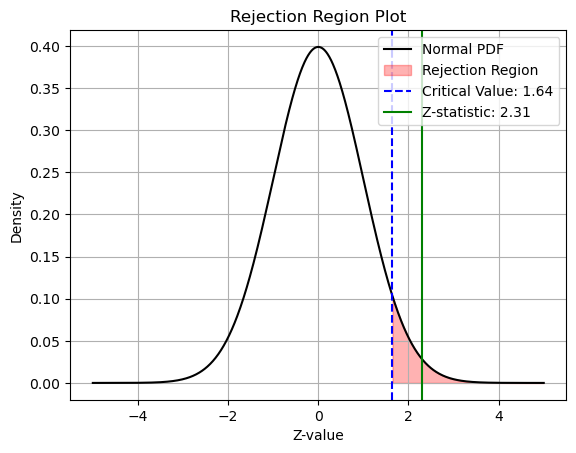

In [75]:
import scipy.stats as stats

hostel = data[data["hosteller"] == 1]
hostel_not = data[data["hosteller"] == 0]
alpha = 0.05
p = len(hostel)/ len(data)
print(f"Alpha: {alpha}")
print(f"Proportion of hostellers: {p}")
# H0 : p <= 0.5
# Ha : p> 0.5

sig = np.sqrt((0.5*0.5)/len(data))
test_statistic = (p - 0.5)/sig
z = 1.64



if test_statistic > z:
    print("as test_statistic > z_alpha")
    print("can reject null hypothesis")
    print("hence, we conclude people who are hostelers are more likely to opt accomodation than day scholars")
else:
    print("not enough evidence to reject null hypothesis")
    
print(f"sigma: {sig}")
print(f"Test statistic: {test_statistic}")
print(f"Critical value (Z-score): {z}")

# Plot rejection region
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='black', label='Normal PDF')
plt.fill_between(x, 0, stats.norm.pdf(x, 0, 1), where=(x > z), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(x=z, color='blue', linestyle='--', label=f'Critical Value: {z}')
plt.axvline(x=test_statistic, color='green', linestyle='-', label=f'Z-statistic: {test_statistic.round(2)}')
plt.xlabel('Z-value')
plt.ylabel('Density')
plt.title('Rejection Region Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
print("P valued test")
p_value = 1 - stats.norm.cdf(test_statistic)
print(f"P-value: {p_value}")

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis")
    print("hence, we conclude people who are hostelers are more likely to opt accomodation than day scholars")
else:
    print("not enough evidence to reject null hypothesis")